In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import FactorAnalysis
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 1. 데이터 로드 및 전처리
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
data = pd.read_csv(url)

# 결측치 제거
data = data.dropna()

# 네 가지 수치형 변수 선택
numeric_columns = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]
data_numeric = data[numeric_columns]

# 데이터 표준화
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)

In [3]:
# 2. 팩터 모형 (Factor Analysis)
fa = FactorAnalysis(n_components=2, random_state=42)
data_reduced = fa.fit_transform(data_scaled)

In [4]:
# 3. Gaussian Mixture Model (GMM)
gmm = GaussianMixture(n_components=3, random_state=42)
clusters = gmm.fit_predict(data_reduced)

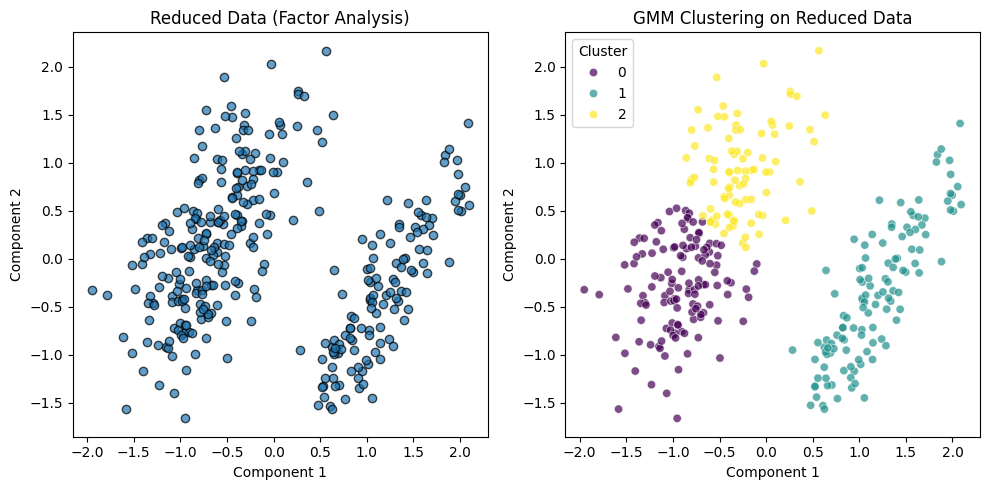

In [5]:
# 4. 결과 시각화
# 축소된 데이터 시각화
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(data_reduced[:, 0], data_reduced[:, 1], alpha=0.7, edgecolors='k')
plt.title("Reduced Data (Factor Analysis)")
plt.xlabel("Component 1")
plt.ylabel("Component 2")

# 클러스터링 결과 시각화
plt.subplot(1, 2, 2)
sns.scatterplot(
    x=data_reduced[:, 0],
    y=data_reduced[:, 1],
    hue=clusters,
    palette="viridis",
    legend="full",
    alpha=0.7
)
plt.title("GMM Clustering on Reduced Data")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()
